# Step 1: Preparing the Dataset
Use VIA annotator to annotate the images.

Place them in a .zip folder as shown below:
```
images
|- "train" directory
  |- 3/4 of the total jpg image files of training data
  |- "via_region_data.json" annotations file of training data
|- "val" directory
  |- 1/4 of the total jpg image files of validation data
  |- "via_region_data.json" annotations file of validation data
```

# Step 2: Modify BLine.py for our own dataset

Access BLine.py from https://github.com/nafri1305/BLineMaskRCNN and modify the following:

First, replace 'BLine' with your custom class name in the following 3 functions in BLine.py:
```
def load_custom(self, dataset_dir, subset):
def load_mask(self, image_id):
def image_reference(self, image_id):
```
Second, modify the NAME in class CustomConfig(Config):
```
class CustomConfig(Config):
    """Configuration for training on the toy  dataset.
    Derives from the base Config class and overrides some values.
    """
    # Give the configuration a recognizable name
    NAME = "BLine"
```




# Step 3: Install Dependencies

In [ ]:
!pip install tensorflow-gpu==1.15.0
!pip install keras==2.2.5

     |████████████████████████████████| 411.5MB 43kB/s 
     |████████████████████████████████| 3.8MB 48.2MB/s 
     |████████████████████████████████| 512kB 53.5MB/s 
     |████████████████████████████████| 51kB 8.6MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=d33aad6b16b72eee3578eff38e9d93a60ffa76f11c040c2ccfc7796143a08ebc
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.3.0 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorboard<3,>=2.3.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.3.0 has requirement tensorflow-estimator<2.4.0,>=2.3.0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing i

In [ ]:
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python setup.py install
!wget https://github.com/matterport/Mask_RCNN/releases/download/v2.0/mask_rcnn_coco.h5

Cloning into 'Mask_RCNN'...
remote: Enumerating objects: 956, done.
remote: Total 956 (delta 0), reused 0 (delta 0), pack-reused 956
Receiving objects: 100% (956/956), 125.23 MiB | 39.74 MiB/s, done.
Resolving deltas: 100% (560/560), done.
/content/Mask_RCNN
running install
running bdist_egg
running egg_info
creating mask_rcnn.egg-info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing top-level names to mask_rcnn.egg-info/top_level.txt
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
reading manifest template 'MANIFEST.in'
writing manifest file 'mask_rcnn.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
creating build
creating build/lib
creating build/lib/mrcnn
copying mrcnn/parallel_model.py -> build/lib/mrcnn
copying mrcnn/model.py -> build/lib/mrcnn
copying mrcnn/__init__.py -> build/lib/mrcnn
copying mrcnn/config.py -> build/lib/mrcnn
copying mrcnn/v

In [ ]:
!git clone https://github.com/nafri1305/BLineMaskRCNN.git
%cd BLineMaskRCNN/
!pip install PyDrive

Cloning into 'BLineMaskRCNN'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (52/52), done.
remote: Total 52 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.
/content/Mask_RCNN/BLineMaskRCNN


#Step 4: Mounting .zip file from Google Drive to Colab
To get the fileID of the .zip file in your Google Drive, right-click the folder and click "Get link".

It should look like this:

https://drive.google.com/file/d/1DFArFAeGngZRXDinl9GcGsEi7WJqOyhG/view?usp=sharing

The fileID is the portion in between /d/ and /view? .

In this example, the fileID of my .zip file is 1DbyAjEdr18Z_0xcj-ubakZ_grptPp6tM .

In [ ]:
fileId = '1g0jGU9ym1GMeQ4W-cKHZBjAHWu6P1UTt'

import os
from zipfile import ZipFile
from shutil import copy
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

os.makedirs('BLine')
os.chdir('BLine')

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

fileName = fileId + '.zip'
downloaded = drive.CreateFile({'id': fileId})
downloaded.GetContentFile(fileName)
ds = ZipFile(fileName)
ds.extractall()
os.remove(fileName)
print('Extracted zip file ' + fileName)

Extracted zip file 1g0jGU9ym1GMeQ4W-cKHZBjAHWu6P1UTt.zip


# Step 5: Training
I trained the model for 10 epochs.

 You can modify BLine.py to change the number of epochs in def train(model):
 ```
model.train(dataset_train, dataset_val,
                learning_rate=config.LEARNING_RATE,
                epochs=10,
                layers='heads')
```
or change the number of steps per epoch in class CustomConfig(Config):
 ```
# Number of training steps per epoch
    STEPS_PER_EPOCH = 100
```

In [ ]:
%cd /content/Mask_RCNN/BLineMaskRCNN
!python3 BLine.py train --dataset=BLine --weights=coco

/content/Mask_RCNN/BLineMaskRCNN
Using TensorFlow backend.
Weights:  coco
Dataset:  BLine
Logs:  /content/Mask_RCNN/logs

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcn

# Step 6.1: Setup configurations for Inference using the Trained Model

In [ ]:
%cd /content/Mask_RCNN

%matplotlib inline
import os
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
ROOT_DIR = os.path.abspath("../")
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

%cd BLineMaskRCNN/
import BLine

# directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")
MODEL_WEIGHTS_PATH = ROOT_DIR +"/BLine_mask_rcnn_coco.h5"

config = BLine.CustomConfig()
BLINE_DIR = ROOT_DIR+"/Mask_RCNN/BLineMaskRCNN/BLine"

# Override the training configurations with a few
# changes for inferencing.
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()

# set target device
DEVICE = "/gpu:0"  # /cpu:0 or /gpu:0

def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

# load validation dataset
dataset = BLine.CustomDataset()
dataset.load_custom(BLINE_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)

/content/Mask_RCNN


Using TensorFlow backend.


/content/Mask_RCNN/BLineMaskRCNN

Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE      

# Step 6.2: Changing weights path

Change weights_path to the path that leads to a .h5 file

Example: "/content/Mask_RCNN/logs/.../mask_rcnn_bline_0030.h5"

In [ ]:
weights_path = "/content/Mask_RCNN/logs/bline20201217T0126/mask_rcnn_bline_0030.h5"

# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Loading weights  /content/Mask_RCNN/logs/bline20201217T0126/mask_rcnn_bline_0030.h5






Re-starting from epoch 30


# Step 6.3: Inference on Test Images

image ID: BLine.BLine_7-18.jpg (44) /content/Mask_RCNN/BLineMaskRCNN/BLine/val/BLine_7-18.jpg
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  151.10000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (2,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (2, 4)                min:  362.00000  max:  681.00000  int32
gt_mask                  shape: (1024, 1024, 2)       min:    0.00000  max:    1.00000  bool


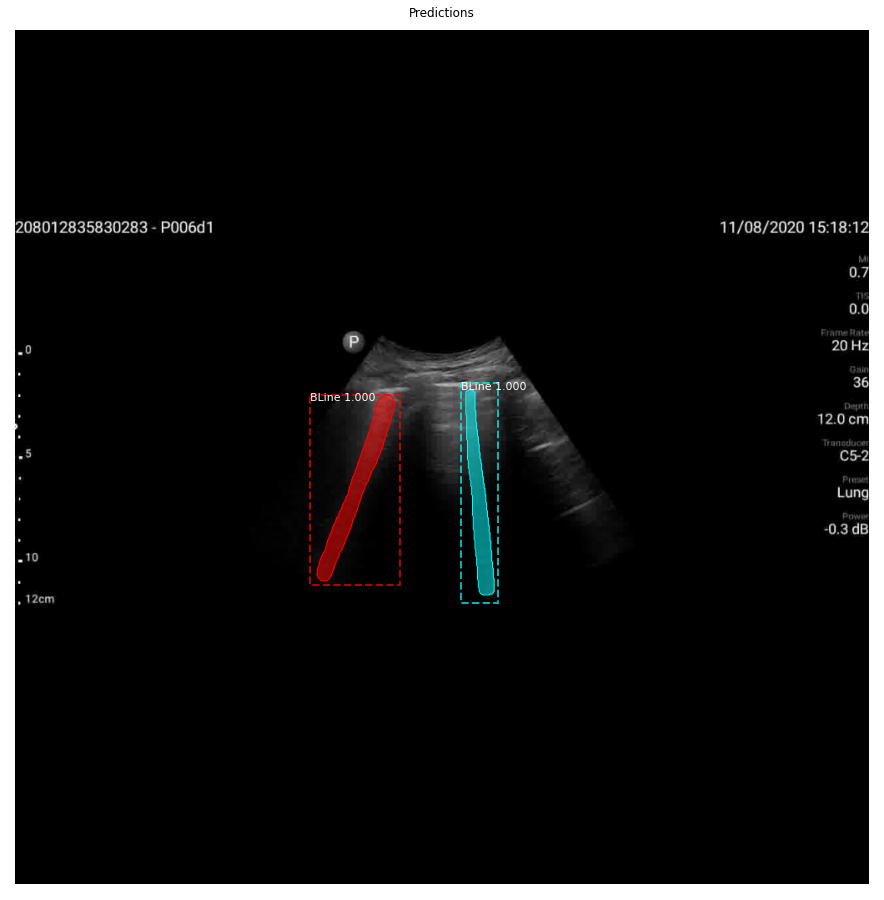

In [ ]:
image_id = random.choice(dataset.image_ids)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)